# L3: Multi-agent Customer Support Automation

In this lesson, you will learn about the six key elements which help make Agents perform even better:
- Role Playing
- Focus
- Tools
- Cooperation
- Guardrails
- Memory

The libraries are already installed in the classroom. If you're running this notebook on your own machine, you can install the following:
```Python
!pip install crewai==0.28.8 crewai_tools==0.1.6 langchain_community==0.0.29
```

In [1]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

- Import libraries, API and LLM

In [2]:
from crewai import Agent, Task, Crew

In [3]:
import os
from utils import get_openai_api_key

openai_api_key = get_openai_api_key()
os.environ["OPENAI_MODEL_NAME"] = 'gpt-3.5-turbo'

## Role Playing, Focus and Cooperation

In [4]:
support_agent = Agent(
    role="Senior Support Representative",
	goal="Be the most friendly and helpful "
        "support representative in your team",
	backstory=(
		"You work at crewAI (https://crewai.com) and "
        " are now working on providing "
		"support to {customer}, a super important customer "
        " for your company."
		"You need to make sure that you provide the best support!"
		"Make sure to provide full complete answers, "
        " and make no assumptions."
	),
	allow_delegation=False,
	verbose=True
)

- By not setting `allow_delegation=False`, `allow_delegation` takes its default value of being `True`.
- This means the agent _can_ delegate its work to another agent which is better suited to do a particular task. 

In [5]:
support_quality_assurance_agent = Agent(
	role="Support Quality Assurance Specialist",
	goal="Get recognition for providing the "
    "best support quality assurance in your team",
	backstory=(
		"You work at crewAI (https://crewai.com) and "
        "are now working with your team "
		"on a request from {customer} ensuring that "
        "the support representative is "
		"providing the best support possible.\n"
		"You need to make sure that the support representative "
        "is providing full"
		"complete answers, and make no assumptions."
	),
	verbose=True
)

* **Role Playing**: Both agents have been given a role, goal and backstory.
* **Focus**: Both agents have been prompted to get into the character of the roles they are playing.
* **Cooperation**: Support Quality Assurance Agent can delegate work back to the Support Agent, allowing for these agents to work together.

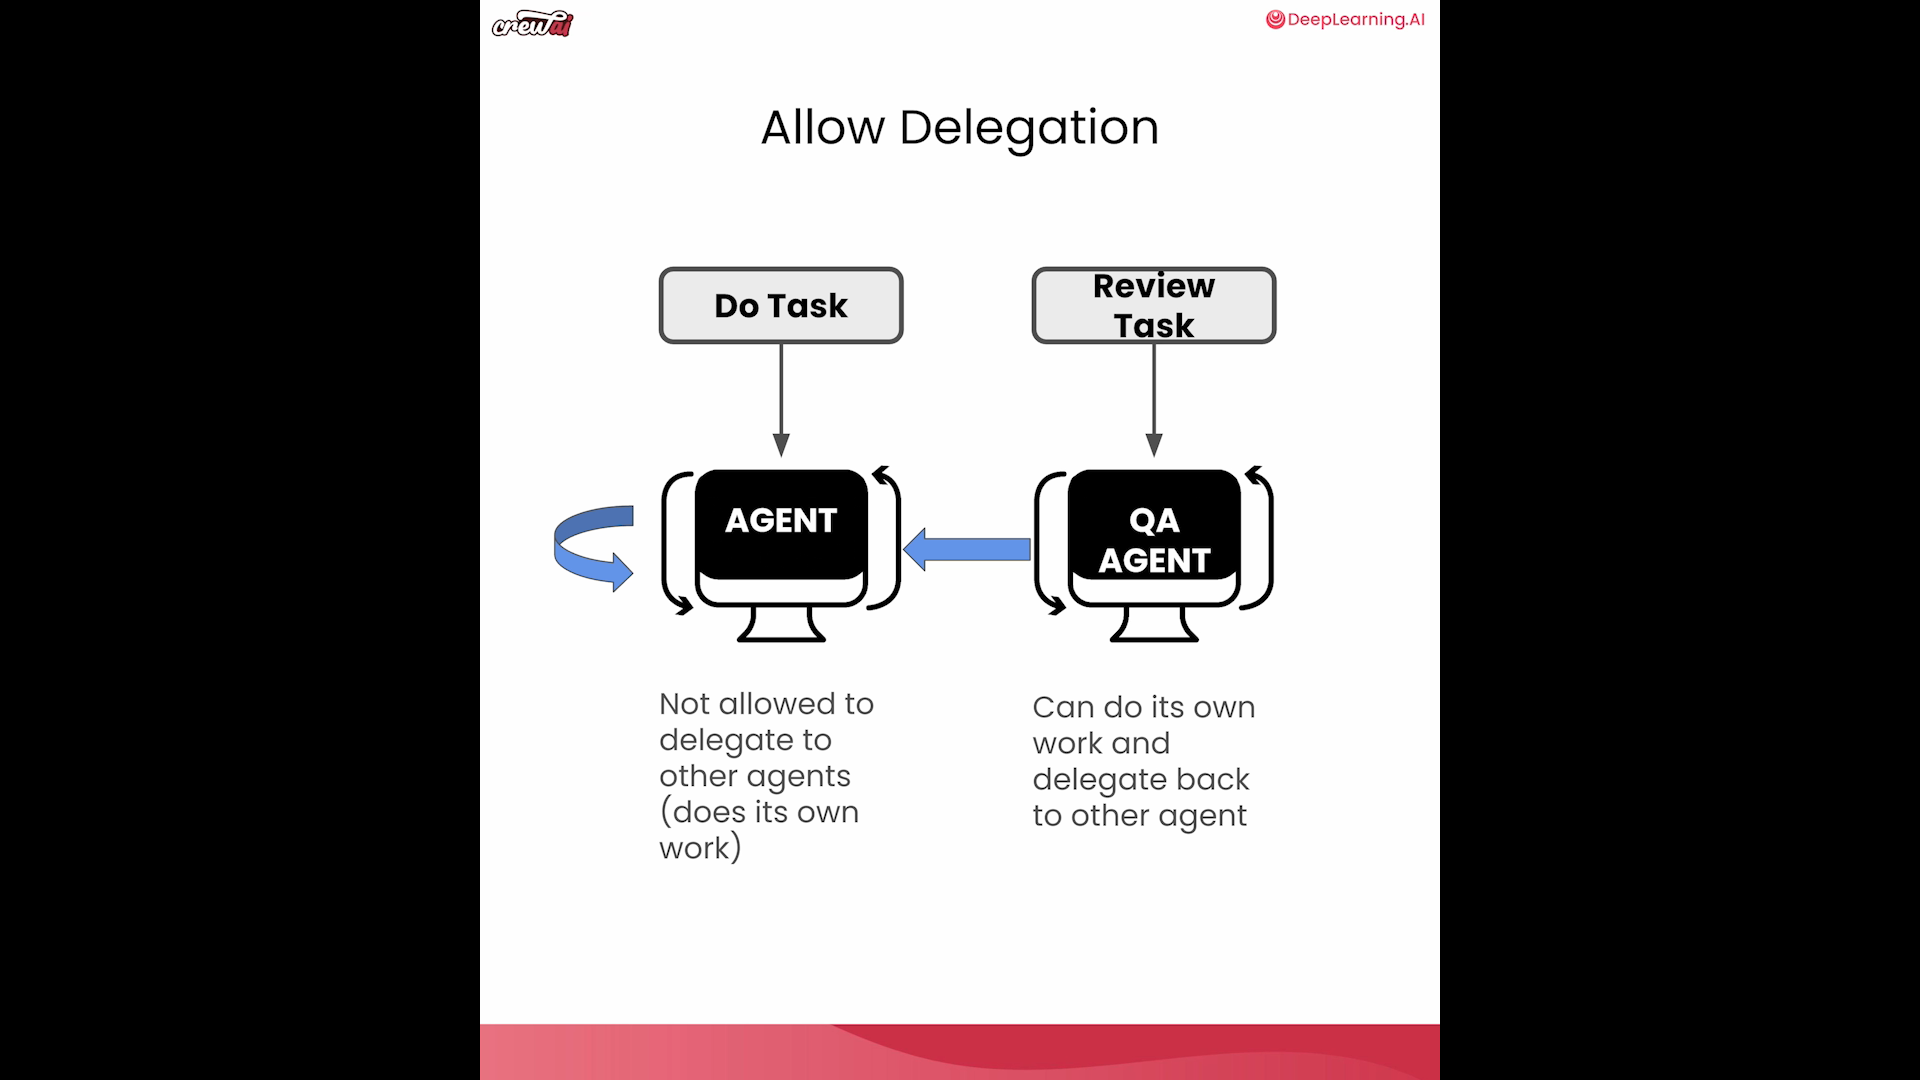

## Tools, Guardrails and Memory

### Tools

- Import CrewAI tools

In [6]:
from crewai_tools import SerperDevTool, \ ## search google
                         ScrapeWebsiteTool, \ ## scrapper of url 
                         WebsiteSearchTool ### This will create RAG of website.

### Possible Custom Tools
- Load customer data
- Tap into previous conversations
- Load data from a CRM
- Checking existing bug reports
- Checking existing feature requests
- Checking ongoing tickets
- ... and more

- Some ways of using CrewAI tools.

```Python
search_tool = SerperDevTool()
scrape_tool = ScrapeWebsiteTool()
```

- Instantiate a document scraper tool.
- The tool will scrape a page (only 1 URL) of the CrewAI documentation.

In [7]:
docs_scrape_tool = ScrapeWebsiteTool(
    website_url="https://docs.crewai.com/how-to/Creating-a-Crew-and-kick-it-off/"
)

##### Different Ways to Give Agents Tools

- Agent Level: The Agent can use the Tool(s) on any Task it performs.
- Task Level: The Agent will only use the Tool(s) when performing that specific Task.

**Note**: Task Tools override the Agent Tools.

### Creating Tasks
- You are passing the Tool on the Task Level.

In [8]:
inquiry_resolution = Task(
    description=(
        "{customer} just reached out with a super important ask:\n"
	    "{inquiry}\n\n"
        "{person} from {customer} is the one that reached out. "
		"Make sure to use everything you know "
        "to provide the best support possible."
		"You must strive to provide a complete "
        "and accurate response to the customer's inquiry."
    ),
    expected_output=(
	    "A detailed, informative response to the "
        "customer's inquiry that addresses "
        "all aspects of their question.\n"
        "The response should include references "
        "to everything you used to find the answer, "
        "including external data or solutions. "
        "Ensure the answer is complete, "
		"leaving no questions unanswered, and maintain a helpful and friendly "
		"tone throughout."
    ),
	tools=[docs_scrape_tool],
    agent=support_agent,
)

- `quality_assurance_review` is not using any Tool(s)
- Here the QA Agent will only review the work of the Support Agent

In [9]:
quality_assurance_review = Task(
    description=(
        "Review the response drafted by the Senior Support Representative for {customer}'s inquiry. "
        "Ensure that the answer is comprehensive, accurate, and adheres to the "
		"high-quality standards expected for customer support.\n"
        "Verify that all parts of the customer's inquiry "
        "have been addressed "
		"thoroughly, with a helpful and friendly tone.\n"
        "Check for references and sources used to "
        " find the information, "
		"ensuring the response is well-supported and "
        "leaves no questions unanswered."
    ),
    expected_output=(
        "A final, detailed, and informative response "
        "ready to be sent to the customer.\n"
        "This response should fully address the "
        "customer's inquiry, incorporating all "
		"relevant feedback and improvements.\n"
		"Don't be too formal, we are a chill and cool company "
	    "but maintain a professional and friendly tone throughout."
    ),
    agent=support_quality_assurance_agent,
)


### Creating the Crew

#### Memory
- Setting `memory=True` when putting the crew together enables Memory.

In [10]:
crew = Crew(
  agents=[support_agent, support_quality_assurance_agent],
  tasks=[inquiry_resolution, quality_assurance_review],
  verbose=2,
  memory=True
)

### Running the Crew

**Note**: LLMs can provide different outputs for they same input, so what you get might be different than what you see in the video.

#### Guardrails
- By running the execution below, you can see that the agents and the responses are within the scope of what we expect from them.

In [11]:
inputs = {
    "customer": "DeepLearningAI",
    "person": "Andrew Ng",
    "inquiry": "I need help with setting up a Crew "
               "and kicking it off, specifically "
               "how can I add memory to my crew? "
               "Can you provide guidance?"
}
result = crew.kickoff(inputs=inputs)

 [DEBUG]: == Working Agent: Senior Support Representative
 [INFO]: == Starting Task: DeepLearningAI just reached out with a super important ask:
I need help with setting up a Crew and kicking it off, specifically how can I add memory to my crew? Can you provide guidance?

Andrew Ng from DeepLearningAI is the one that reached out. Make sure to use everything you know to provide the best support possible.You must strive to provide a complete and accurate response to the customer's inquiry.


> Entering new CrewAgentExecutor chain...
I need to provide Andrew Ng from DeepLearningAI with the best support possible by using the tools available to me.

Action: Read website content
Action Input: {
    "url": "https://docs.crewai.com/how-to/Creating-a-Crew-and-kick-it-off/"
}
 

Assembling and Activating Your CrewAI Team - crewAI
 Skip to content
 crewAI
 Assembling and Activating Your CrewAI Team
 Initializing search
 crewAI
 crewAI
 crewAI
 Home
 Core Concepts
 Core Concepts
 Agents
 Tasks
 To



> Entering new CrewAgentExecutor chain...
I need to ensure that the response drafted by the Senior Support Representative is comprehensive, accurate, and meets the high-quality standards expected for customer support. I should carefully review the steps provided and check for any missing information or areas that can be improved upon.

Action: Ask question to co-worker
Action Input: 
{
  "coworker": "Senior Support Representative",
  "question": "Can you explain in more detail how the memory attribute works for the senior researcher agent?",
  "context": "I need to clarify the functionality of the memory attribute for the senior researcher agent in the response provided to DeepLearningAI."
}


> Entering new CrewAgentExecutor chain...
I now can give a great answer

Final Answer: 
To explain in more detail how the memory attribute works for the senior researcher agent, it is important to understand that the memory attribute in the context of a Crew created using crewAI refers to the a

- Display the final result as Markdown.

In [12]:
from IPython.display import Markdown
Markdown(result)

Dear Andrew Ng from DeepLearningAI,

Thank you for reaching out with your question about setting up a Crew and adding memory to it. I understand the importance of this task for your project, and I'm here to provide you with detailed guidance on how to achieve this.

To add memory to your Crew, you can follow these steps:

1. Install CrewAI and any necessary packages for your project. CrewAI is compatible with Python >=3.10,<=3.13. You can do this by running the following commands:
   ```
   pip install crewai
   pip install 'crewai[tools]'
   ```

2. Assemble Your Agents: Define your agents with distinct roles, backstories, and enhanced capabilities. You can create a senior researcher agent with memory enabled by setting the 'memory' attribute to True. Here's an example of how you can create a senior researcher agent with memory:
   ```
   researcher = Agent(
       role='Senior Researcher',
       goal='Uncover groundbreaking technologies in {topic}',
       backstory=("Driven by curiosity, you're at the forefront of innovation, eager to explore and share knowledge that could change the world."),
       memory=True,
       verbose=True,
       allow_delegation=False,
       tools=[search_tool, browser_tool],
       allow_code_execution=False,
       max_iter=15,
       max_rpm=100,
       max_execution_time=3600,
       system_template="Your custom system template here",
       prompt_template="Your custom prompt template here",
       response_template="Your custom response template here",
   )
   ```

3. Customize the memory attributes and features of your agent:
   - allow_code_execution: Enable or disable code execution capabilities for the agent (default is False).
   - max_execution_time: Set a maximum execution time (in seconds) for the agent to complete a task.
   - function_calling_llm: Specify a separate language model for function calling.

By following these steps, you can successfully add memory to your Crew and enhance the capabilities of your AI team. If you have any further questions or need additional assistance, please feel free to reach out. We are here to help you succeed in your project.

Best regards,

[Your Name]
Senior Support Representative
crewAI